# Load data  
In this notebook, we'll look at how to open the downloaded data, how the data is organised, and ways of visualising them.

In [93]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import os, json
from pathlib import Path
import pandas as pd
import PIL, geopandas as gpd
import shapely.wkt, shapely.geometry

import matplotlib.pyplot as plt

In [2]:
SOURCE = Path('data')
SOURCE_TRN = SOURCE/'train/train'

In [3]:
# export
Path.ls = lambda o: list(o.iterdir())

### One image  
To keep things simple, let's look at a single image first.  This includes: 

1. image before disaster
2. image after disaster
3. labels before disaster
4. labels after disaster

In [4]:
fn_pre = (SOURCE_TRN/'images').ls()[0]

In [5]:
fn_pre

PosixPath('data/train/train/images/hurricane-harvey_00000015_pre_disaster.png')

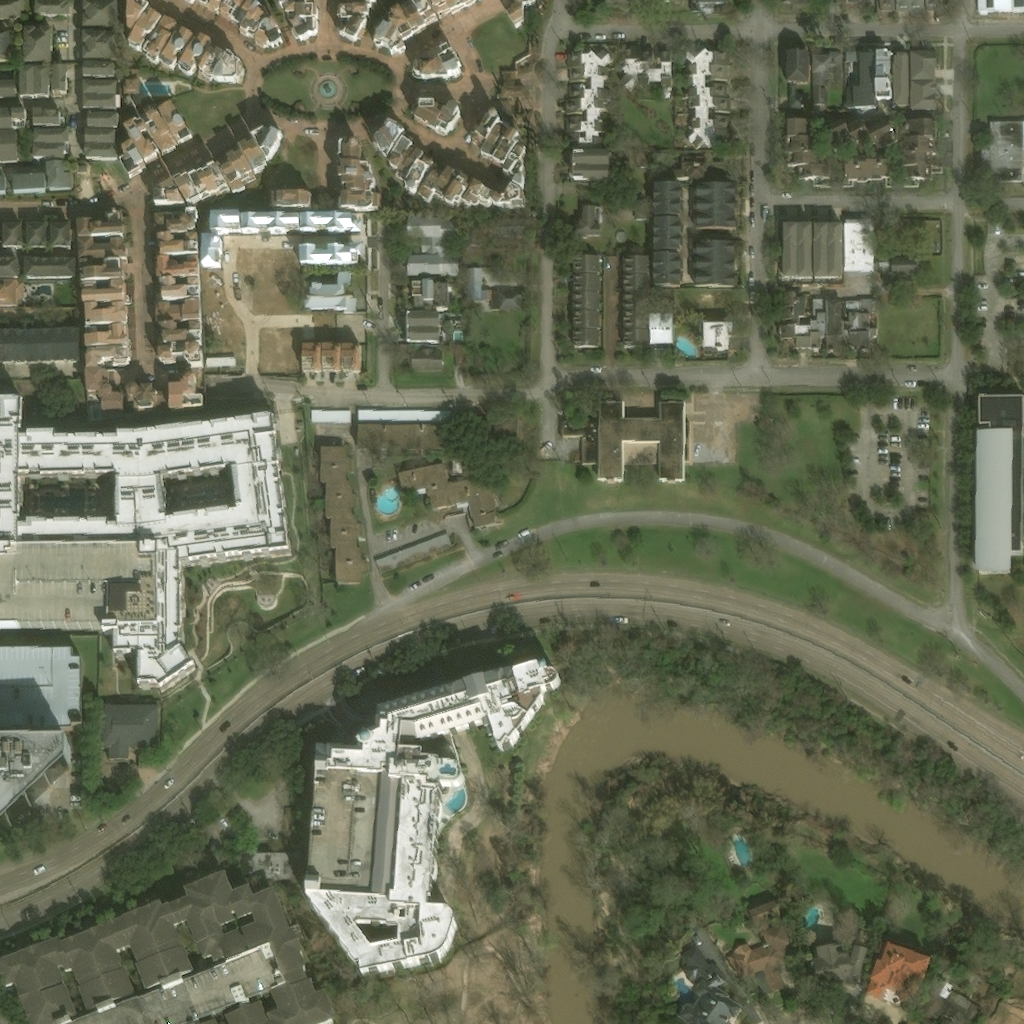

In [6]:
img = PIL.Image.open(fn_pre)
img

In [7]:
fn_post = Path(str(fn_pre).replace('_pre_', '_post_'))

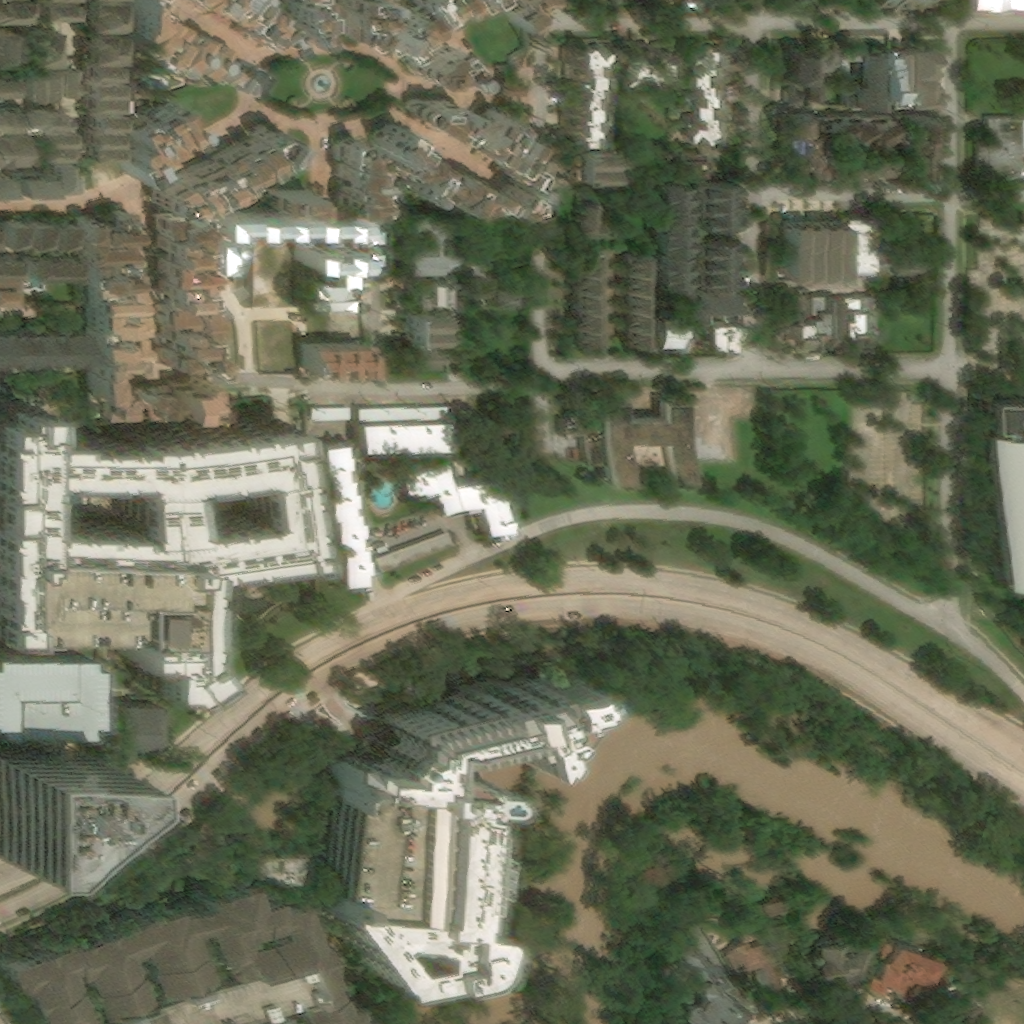

In [8]:
img_post = PIL.Image.open(fn_post)
img_post

Get the labels for the pre-disaster image.

In [9]:
ln_pre = Path(str(fn_pre).replace('images/', 'labels/').replace('.png', '.json'))
ln_pre

PosixPath('data/train/train/labels/hurricane-harvey_00000015_pre_disaster.json')

In [10]:
label_pre = json.load(open(ln_pre))

In [11]:
label_pre['metadata']

{'sensor': 'WORLDVIEW02',
 'provider_asset_type': 'WORLDVIEW02',
 'gsd': 1.9022960000000002,
 'capture_date': '2017-02-16T17:11:21.000Z',
 'off_nadir_angle': 9.628279,
 'pan_resolution': 0.47468278,
 'sun_azimuth': 151.00522,
 'sun_elevation': 43.56225,
 'target_azimuth': 337.39954,
 'disaster': 'hurricane-harvey',
 'disaster_type': 'flooding',
 'catalog_id': '10300100646E2700',
 'original_width': 1024,
 'original_height': 1024,
 'width': 1024,
 'height': 1024,
 'id': 'MjUwNjIwOQ.2PKqp-yTP2BgmOA0GIxVcGBHTDE',
 'img_name': 'hurricane-harvey_00000015_pre_disaster.png'}

Below, 177 is probably the number of buildings in the image, and `lng_lat` and `xy` are just two different coordinates for the points that mark out the buildings.

In [12]:
len(label_pre['features']['lng_lat']), len(label_pre['features']['xy'])

(177, 177)

To keep things simple again, pick the first building:

In [13]:
label_pre['features']['lng_lat'][0].keys()

dict_keys(['properties', 'wkt'])

In [14]:
label_pre['features']['lng_lat'][0]['properties']

{'feature_type': 'building', 'uid': '7ae792ae-64b5-41ec-be7b-14873c450650'}

In [15]:
label_pre['features']['lng_lat'][0]['wkt']

'POLYGON ((-95.41102926435376 29.76309456784569, -95.4110825675747 29.76308334133724, -95.41108351388101 29.76301382188467, -95.41110273894589 29.76299865933084, -95.41123588128708 29.76299623111566, -95.41126092788402 29.76300602872893, -95.41127311231695 29.76302403658602, -95.41127836016715 29.76335208235243, -95.41127925111232 29.76360728724421, -95.41128088388054 29.76362093002539, -95.41121828284908 29.76362435053944, -95.41121986103698 29.76363571555689, -95.41126418752256 29.76363262834694, -95.41127112345158 29.76364959254563, -95.41127271054242 29.76377033788605, -95.4112350470653 29.76377900047818, -95.41121660876681 29.76377250048382, -95.41104552561549 29.76377334189323, -95.41102926435376 29.76309456784569))'

In [16]:
label_pre['features']['xy'][0].keys()

dict_keys(['properties', 'wkt'])

In [17]:
label_pre['features']['xy'][0]['properties']

{'feature_type': 'building', 'uid': '7ae792ae-64b5-41ec-be7b-14873c450650'}

In [18]:
label_pre['features']['xy'][0]['wkt']

'POLYGON ((1024 553.9979251598664, 1012.904420922699 556.4321427018897, 1012.363483691138 572.9307282644919, 1008.306454454433 576.4468202696365, 980.7186556448357 576.4468202696365, 975.5797519450089 574.0126027276133, 973.1455344029856 569.6851048751275, 973.6864716345463 491.7901435303829, 974.7683460976677 431.2051735955815, 974.4978774818874 427.9595502062171, 987.4803710393448 427.4186129746564, 987.2099024235645 424.7139268168527, 978.0139694870321 425.2548640484135, 976.6616264081302 421.197834811708, 976.9320950239106 392.5281615389895, 984.7756848815412 390.6348812285269, 988.5622455024662 392.2576929232091, 1024 392.7986301547699, 1024 553.9979251598664))'

Get the post-disaster labels for this image.

In [19]:
ln_post = Path(str(fn_post).replace('images/', 'labels/').replace('.png', '.json'))
ln_post

PosixPath('data/train/train/labels/hurricane-harvey_00000015_post_disaster.json')

In [20]:
label_post = json.load(open(ln_post))

In [21]:
label_post['metadata']

{'sensor': 'GEOEYE01',
 'provider_asset_type': 'GEOEYE01',
 'gsd': 3.024613,
 'capture_date': '2017-08-31T17:38:50.685Z',
 'off_nadir_angle': 42.91436,
 'pan_resolution': 0.7532107,
 'sun_azimuth': 152.30608,
 'sun_elevation': 66.44999,
 'target_azimuth': 111.736275,
 'disaster': 'hurricane-harvey',
 'disaster_type': 'flooding',
 'catalog_id': '105001000B95E100',
 'original_width': 1024,
 'original_height': 1024,
 'width': 1024,
 'height': 1024,
 'id': 'MjU3ODQ3MA.GzZy_q02fparrEETsS-bEfbSfTY',
 'img_name': 'hurricane-harvey_00000015_post_disaster.png'}

Notice that pre-disaster and post-disaster metadata are mostly different, but *disaster* and *disaster-type* are the same.  Here below, only the xy-coorindates will be looked at for the first building.

In [22]:
label_post['features']['xy'][0].keys()

dict_keys(['properties', 'wkt'])

In [23]:
label_post['features']['xy'][0]['properties']

{'feature_type': 'building',
 'subtype': 'no-damage',
 'uid': '7ae792ae-64b5-41ec-be7b-14873c450650'}

Notice that for the same building in the same image, the `uid`s are the same pre-disaster and post-disaster.

Pre-disaster: '7ae792ae-64b5-41ec-be7b-14873c450650'.

In [24]:
label_post['features']['xy'][0]['wkt']

'POLYGON ((1022.551344564632 554.315741357645, 1012.904418126025 556.4321441020223, 1012.363480895803 572.930729663819, 1008.306451655674 576.4468216703614, 980.7186528446579 576.4468216703614, 975.579749147948 574.012604127754, 973.1455316058399 569.6851062730111, 973.6864688340678 491.7901449325112, 974.768343297878 431.2051749970225, 974.497874685509 427.959551608209, 987.4803682425049 427.4186143737485, 987.2098996232805 424.7139282174011, 978.0139666863167 425.2548654478728, 976.6616236088912 421.1978362128531, 976.932092224875 392.5281629410113, 984.7756820831667 390.6348826278785, 988.5622427065643 392.2576943232825, 1022.551377597889 392.776520229632, 1022.551344564632 554.315741357645))'

Repeat above for the second building listed in this image.

In [25]:
label_pre['features']['xy'][1]['properties']

{'feature_type': 'building', 'uid': '4ca98eb5-10bd-4d75-b3b3-3b9012291c1f'}

In [26]:
label_post['features']['xy'][1]['properties']

{'feature_type': 'building',
 'subtype': 'no-damage',
 'uid': '4ca98eb5-10bd-4d75-b3b3-3b9012291c1f'}

In [27]:
label_pre['features']['xy'][1]['wkt']

'POLYGON ((924.5747957019053 13.45840736373425, 924.1389521745577 13.45840736373425, 911.519587814584 13.12631882794548, 905.043861366703 11.96400895268476, 896.39 12.27, 895.7034719961625 0, 925.1147957019052 0, 924.5747957019053 13.45840736373425))'

In [28]:
label_post['features']['xy'][1]['wkt']

'POLYGON ((924.5747928985843 13.45840876531238, 924.1389493733565 13.45840876531238, 911.5195850119812 13.12632022977857, 905.0438585653342 11.96401035491163, 896.3899971970549 12.27000140061607, 895.7039738000855 0.009020025291096228, 925.1144507876871 0.008527897598268323, 924.5747928985843 13.45840876531238))'

### Polygon

In the raw data, the area covered by a feature (like a building) is expressed in *well-known text representation ([wkt](https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry)*, which can be loaded using `shapely.wkt.loads`.

In [29]:
s = label_pre['features']['xy'][15]['wkt']
s

'POLYGON ((740.6710726431013 232.5370939607444, 730.9342024750082 231.7256881134033, 711.1899935230417 230.9142822660622, 693.8800021130985 231.4552194976229, 691.7162531868555 225.7753785662353, 687.9296925659304 217.9317887086048, 687.3887553343698 203.0560148406848, 686.847818102809 185.7460234307416, 692.5276590341966 178.4433708046717, 734.9912317117137 177.0910277257699, 739.8596667957602 181.1480569624754, 737.1549806379566 193.5896132883721, 741.4824784904424 206.5721068458295, 740.9415412588817 232.5370939607444, 740.6710726431013 232.5370939607444))'

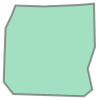

In [30]:
shapely.wkt.loads(s)

Gather all the features of the current image in a `geopandas.GeoDataFrame`.  Each row of this will correpond to a feature.  Each feature will have three bits of information: `uid`, `feature_type` and `wkt`.  

In [31]:
label_pre['features']['xy'][0]

{'properties': {'feature_type': 'building',
  'uid': '7ae792ae-64b5-41ec-be7b-14873c450650'},
 'wkt': 'POLYGON ((1024 553.9979251598664, 1012.904420922699 556.4321427018897, 1012.363483691138 572.9307282644919, 1008.306454454433 576.4468202696365, 980.7186556448357 576.4468202696365, 975.5797519450089 574.0126027276133, 973.1455344029856 569.6851048751275, 973.6864716345463 491.7901435303829, 974.7683460976677 431.2051735955815, 974.4978774818874 427.9595502062171, 987.4803710393448 427.4186129746564, 987.2099024235645 424.7139268168527, 978.0139694870321 425.2548640484135, 976.6616264081302 421.197834811708, 976.9320950239106 392.5281615389895, 984.7756848815412 390.6348812285269, 988.5622455024662 392.2576929232091, 1024 392.7986301547699, 1024 553.9979251598664))'}

In [32]:
label_pre['features']['xy'][1]

{'properties': {'feature_type': 'building',
  'uid': '4ca98eb5-10bd-4d75-b3b3-3b9012291c1f'},
 'wkt': 'POLYGON ((924.5747957019053 13.45840736373425, 924.1389521745577 13.45840736373425, 911.519587814584 13.12631882794548, 905.043861366703 11.96400895268476, 896.39 12.27, 895.7034719961625 0, 925.1147957019052 0, 924.5747957019053 13.45840736373425))'}

In [33]:
def feature2srs(o):
    d = o['properties']
    d.update({'wkt': o['wkt']})
    return pd.Series(d)

def features2df(fs):
    df = pd.DataFrame()
    for f in fs: df = df.append(feature2srs(f), ignore_index=True)
    return df

In [34]:
df = features2df(label_pre['features']['xy'])
df.head()

feature_type                                   uid  \
0     building  7ae792ae-64b5-41ec-be7b-14873c450650   
1     building  4ca98eb5-10bd-4d75-b3b3-3b9012291c1f   
2     building  22e5eb6a-f924-4b27-9cb0-90b112bcfd66   
3     building  e2ef0265-66e4-4104-a1a9-3fa985275a1d   
4     building  e4e531da-2183-440a-9501-66873422625e   

                                                 wkt  
0  POLYGON ((1024 553.9979251598664, 1012.9044209...  
1  POLYGON ((924.5747957019053 13.45840736373425,...  
2  POLYGON ((946.3888840724057 13.12631882794548,...  
3  POLYGON ((895.9 12.44, 894.617408312335 13.084...  
4  POLYGON ((937.4014137203127 83.22002790647021,...

The `'wkt'` column is actually of type `str`.  Converting it to `shapely`'s polygon type, and naming the resulting column `'geometry'`, the `descartes` package can plot all the features off the `GeoDataFrame`.

In [35]:
gdf = gpd.GeoDataFrame(df)
#gdf = gdf.rename({'wkt': 'geometry'}, axis=1)
gdf['geometry'] = gdf.wkt.apply(shapely.wkt.loads)
gdf.drop('wkt', axis=1, inplace=True)
gdf.head()

feature_type                                   uid  \
0     building  7ae792ae-64b5-41ec-be7b-14873c450650   
1     building  4ca98eb5-10bd-4d75-b3b3-3b9012291c1f   
2     building  22e5eb6a-f924-4b27-9cb0-90b112bcfd66   
3     building  e2ef0265-66e4-4104-a1a9-3fa985275a1d   
4     building  e4e531da-2183-440a-9501-66873422625e   

                                            geometry  
0  POLYGON ((1024.000 553.998, 1012.904 556.432, ...  
1  POLYGON ((924.575 13.458, 924.139 13.458, 911....  
2  POLYGON ((946.389 13.126, 926.131 13.458, 925....  
3  POLYGON ((895.900 12.440, 894.617 13.084, 879....  
4  POLYGON ((937.401 83.220, 940.377 89.170, 945....

All the polygons can be quickly viewed off a `geopandas.GeoDataFrame` object.  However, here, the plot appears to be upside-down.  Not sure what's happening here...

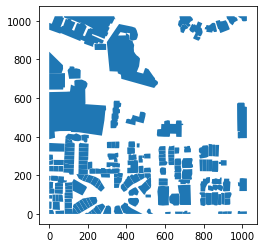

In [179]:
gdf.plot();

### Convert polygon to mask

In [40]:
import numpy as np
import cv2

Grab the wkt of a polygon.

In [68]:
poly_wkt = label_pre['features']['xy'][0]['wkt']
poly_wkt

'POLYGON ((1024 553.9979251598664, 1012.904420922699 556.4321427018897, 1012.363483691138 572.9307282644919, 1008.306454454433 576.4468202696365, 980.7186556448357 576.4468202696365, 975.5797519450089 574.0126027276133, 973.1455344029856 569.6851048751275, 973.6864716345463 491.7901435303829, 974.7683460976677 431.2051735955815, 974.4978774818874 427.9595502062171, 987.4803710393448 427.4186129746564, 987.2099024235645 424.7139268168527, 978.0139694870321 425.2548640484135, 976.6616264081302 421.197834811708, 976.9320950239106 392.5281615389895, 984.7756848815412 390.6348812285269, 988.5622455024662 392.2576929232091, 1024 392.7986301547699, 1024 553.9979251598664))'

Load the wkt into a `shapely.geometry.polygon.Polygon` object.

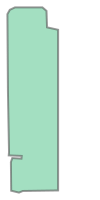

In [105]:
poly = shapely.wkt.loads(poly_wkt)
poly

Use `shapely.geometry.mapping` to extract the coordinates of the points that form the polygon.  A `dict` object is returned.

In [96]:
poly_mapped = shapely.geometry.mapping(poly)
poly_mapped

{'type': 'Polygon',
 'coordinates': (((1024.0, 553.9979251598664),
   (1012.904420922699, 556.4321427018897),
   (1012.363483691138, 572.9307282644919),
   (1008.306454454433, 576.4468202696365),
   (980.7186556448357, 576.4468202696365),
   (975.5797519450089, 574.0126027276133),
   (973.1455344029856, 569.6851048751275),
   (973.6864716345463, 491.7901435303829),
   (974.7683460976677, 431.2051735955815),
   (974.4978774818874, 427.9595502062171),
   (987.4803710393448, 427.4186129746564),
   (987.2099024235645, 424.7139268168527),
   (978.0139694870321, 425.2548640484135),
   (976.6616264081302, 421.197834811708),
   (976.9320950239106, 392.5281615389895),
   (984.7756848815412, 390.6348812285269),
   (988.5622455024662, 392.2576929232091),
   (1024.0, 392.7986301547699),
   (1024.0, 553.9979251598664)),)}

Cast the coordinates into a numpy array of dtype `np.int32` and of shape `(number of polygons, number of points in polygon, number of spatial dimension)`.  `number of spatial dimensions` is 2 here, for x and y.

In [97]:
poly_na = np.array(poly_mapped['coordinates'], dtype=np.int32)
poly_na

array([[[1024,  553],
        [1012,  556],
        [1012,  572],
        [1008,  576],
        [ 980,  576],
        [ 975,  574],
        [ 973,  569],
        [ 973,  491],
        [ 974,  431],
        [ 974,  427],
        [ 987,  427],
        [ 987,  424],
        [ 978,  425],
        [ 976,  421],
        [ 976,  392],
        [ 984,  390],
        [ 988,  392],
        [1024,  392],
        [1024,  553]]], dtype=int32)

Using the coordinates of the points of the polygons, and the image size, a mask containing the polygons can be created using `cv2.fillPoly`.

In [43]:
img.size

(1024, 1024)

In [124]:
img_blank = np.zeros((1024, 1024, 3), dtype=np.uint8)

In [125]:
poly_mask = cv2.fillPoly(img_blank, poly_na, (1, 1, 1))
poly_mask.shape, poly_mask.sum()

((1024, 1024, 3), 27075)

Check that `poly_mask` is a binary mask.  That is, it only contains either 0 or 1 in its values. 1 for there exists feature (like a building), 0 for there exists *no* feature.

In [126]:
np.unique(poly_mask)

array([0, 1], dtype=uint8)

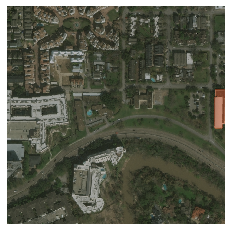

In [139]:
plt.imshow(img);
plt.imshow(np.array([255, 50, 1]) * poly_mask, alpha=.3)
plt.axis('off');

### Multiple polygons to mask

Each polygon represents a feature.  Most of the time there is more than one feature in an image.  The polygons of these features need to go on the same mask.

Above we have already gathered all features into a `geopandas.GeoDataFrame` object, where the `geometry` column contains the `shapely.geometry.polygon.Polygon` object for each feature.

In [146]:
gdf.head()

feature_type                                   uid  \
0     building  7ae792ae-64b5-41ec-be7b-14873c450650   
1     building  4ca98eb5-10bd-4d75-b3b3-3b9012291c1f   
2     building  22e5eb6a-f924-4b27-9cb0-90b112bcfd66   
3     building  e2ef0265-66e4-4104-a1a9-3fa985275a1d   
4     building  e4e531da-2183-440a-9501-66873422625e   

                                            geometry  
0  POLYGON ((1024.000 553.998, 1012.904 556.432, ...  
1  POLYGON ((924.575 13.458, 924.139 13.458, 911....  
2  POLYGON ((946.389 13.126, 926.131 13.458, 925....  
3  POLYGON ((895.900 12.440, 894.617 13.084, 879....  
4  POLYGON ((937.401 83.220, 940.377 89.170, 945....

Iterate through the rows, getting the coordinates of the points of each polygon.  Then, put them in a `np.array`.  `poly_nas`'s length is the number of features/polygons.  Each element in it is a `np.array` object that contains the y and x  coorindates of the points of a polygon.  For example, `poly_nas[2][0,1]` is the x-coorindate of the first point of the third feature.

In [159]:
poly_nas = []
for _, r in gdf.iterrows():
    poly = r.geometry
    poly_mapped = shapely.geometry.mapping(poly)
    poly_na = np.array(poly_mapped['coordinates'][0], dtype=np.int32)
    poly_nas.append(poly_na)
    
poly_nas = np.array(poly_nas)

In [166]:
poly_nas[2]

array([[946,  13],
       [926,  13],
       [925,  13],
       [925,   0],
       [943,   0],
       [946,  13]], dtype=int32)

In [168]:
polys_mask = cv2.fillPoly(img_blank, poly_nas, (1, 1, 1))

Check that it is a binary mask.  Note that if it isn't, then it measn that some of the features' polygons overlap.

In [171]:
np.unique(polys_mask), polys_mask.shape

(array([0, 1], dtype=uint8), (1024, 1024, 3))

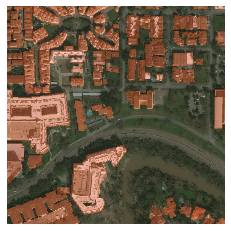

In [175]:
plt.imshow(img)
plt.imshow(np.array([255, 50, 0]) * polys_mask, alpha=.3)
plt.axis('off');

`polys_mask` can be forced to be a binary mask by setting all the overlapped pixels to 0.

In [186]:
polys_mask[polys_mask > 1] = 0

There are more sophisticated ways of dealing with overlapping polygons, such as shrinking all polygons towards their centre by a little, as this decreases the chance of overlaps. See the xview2's benchmark for more details.

# - fin